<a href="https://colab.research.google.com/github/alehfernandez/Data-Science-III-NLP-Deep-Learning/blob/main/Proyecto_DS_III_Entrega_Final_Fernandez_Alejandro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Proyecto Final: Críticas Filmaffinity Netflix Español**




**Abstracto con Motivación y Audiencia**

El análisis de reseñas de películas es importante en el contexto actual del entretenimiento, plataformas como Netflix compiten por la atención de los usuarios debido a la variada oferta de la competencia. Este proyecto se centra en el análisis de sentimiento de las reseñas para comprender las preferencias del público y  los factores que influyen en la popularidad de las películas. Este análisis está dirigido a areas de marketing y entretenimiento de empresas relacionadas al streaming.

**Contexto Comercial y Analítico**

Comercial: Por medio del analisis de sentimiento las empresas de streaming podrian entender las preferencias de los usuarios, tener recomendaciones más eficientes

Analítico: utilizaremos técnicas de NLP como la tokenización y el análisis de frecuencia de palabras, junto con modelos de Deep Learning para la clasificación de sentimiento.

**Objetivo**

Desarrollar un modelo de Deep Learning capaz de clasificar reseñas de películas como positivas o negativas con precisión. Automatizar el análisis de sentimiento y obtener información relevante sobre los gustos de los usuarios.

### **Lectura de datos**

**Librerias necesarias**

In [8]:
import pandas as pd
import nltk
import spacy

#recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Carga el modelo en español de spacy
!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 105.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


**Configuración del entorno de Python en Google Colab, Lectura y Analisis Inicial**

In [9]:
url = 'https://raw.githubusercontent.com/alehfernandez/Data-Science-III-NLP-Deep-Learning/main/Cr%C3%ADticas%20Filmaffinity%20Netflix%20Espa%C3%B1ol%20(+10000).csv'

df = pd.read_csv(url, delimiter='|')

print(df.head())
print(df.info())
print(df['review_rate'].value_counts())

               film_name                        gender film_avg_rate  \
0  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
1  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
2  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
3  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   
4  Respira (Serie de TV)  Serie de TV, Drama, Medicina           4,6   

   review_rate                         review_title  \
0            1                              Respira   
1            2  Esta serie te llama tonto a la cara   
2            1                              Respira   
3            1             Imposible, no hay manera   
4            1                        Serie nefasta   

                                         review_text  
0  Como fan de las series españolas y de Najwa, e...  
1  Todo lo malo que puede tener una serie lo pose...  
2  La serie es un drama médico que intenta "copia...  
3  Nadie te obli

In [10]:
# Distribución de géneros
print("Distribución de géneros:")
print(df['gender'].value_counts())

# Distribución de calificaciones individuales (review_rate)
print("\nDistribución de calificaciones (review_rate):")
print(df['review_rate'].value_counts())

# Distribución de calificaciones promedio de películas (film_avg_rate)
print("\nEstadísticas descriptivas de calificaciones promedio (film_avg_rate):")
print(df['film_avg_rate'].describe())

Distribución de géneros:
gender
Serie de TV, Thriller, Intriga, Acción, Robos & Atracos, Secuestros / Desapariciones                                   339
Comedia, Drama, Ciencia ficción, Sátira, Catástrofes, Fin del mundo, Cambio climático                                  320
Drama, Aventuras, Basado en hechos reales, Supervivencia, Naturaleza, Años 70, Zonas frías/polares, Escenario único    271
Thriller, Drama, Vida rural                                                                                            246
Western, Drama, Drama psicológico, Homosexualidad, Años 20                                                             196
                                                                                                                      ... 
Serie de TV, Thriller, Drama, Alcoholismo                                                                                1
Serie de TV, Comedia, Discapacidad, Discapacidad visual, Biográfico, Amistad                               

# Análisis Exploratorio

Longitud promedio de las oraciones: 243.70 palabras


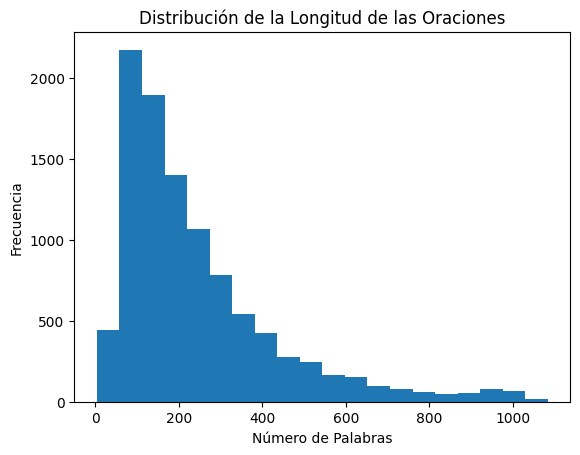

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def analizar_longitud_oraciones(df):
    df['review_text'] = df['review_text'].fillna('')
    longitudes_oraciones = df['review_text'].str.split().apply(len)

    # Estadísticas descriptivas
    longitud_promedio = np.mean(longitudes_oraciones)
    print(f'Longitud promedio de las oraciones: {longitud_promedio:.2f} palabras')

    # Histograma
    plt.hist(longitudes_oraciones, bins=20)
    plt.title('Distribución de la Longitud de las Oraciones')
    plt.xlabel('Número de Palabras')
    plt.ylabel('Frecuencia')
    plt.show()

analizar_longitud_oraciones(df)

Palabras más comunes:
de: 129326
que: 100612
la: 79592
y: 70182
en: 54345
a: 47073
el: 45976
un: 34381
es: 33191
una: 32637


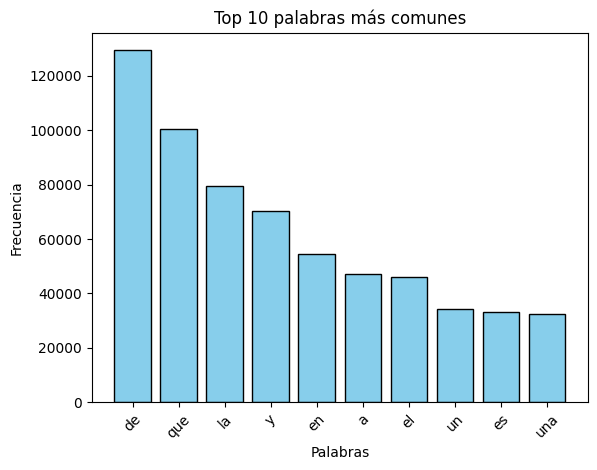

In [12]:
# Import the Counter class from the collections module
from collections import Counter

# Combinar todas las reseñas en un único string
all_words = ' '.join(df['review_text'].dropna())

# Now Counter should be recognized
word_counts = Counter(all_words.split())
print("Palabras más comunes:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

# Visualización de las palabras más comunes
import matplotlib.pyplot as plt

words, counts = zip(*word_counts.most_common(10))

# Crear el gráfico de barras
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.title('Top 10 palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [13]:
import re
import spacy

# Cargar modelo en español para obtener las stopwords
nlp = spacy.load('es_core_news_sm')
stopwords = nlp.Defaults.stop_words

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+', '', text)
    # Eliminar puntuación y caracteres especiales
    text = re.sub(r'[^a-záéíóúñ\s]', '', text)
    # Eliminar stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords]
    # Reconstruir el texto limpio
    return ' '.join(words)

# Aplicar la limpieza al texto de las reseñas
df['cleaned_review_text'] = df['review_text'].apply(lambda x: clean_text(str(x)))

# Mostrar ejemplo de reseña antes y después de limpiar
print("Ejemplo de texto antes y después de la limpieza:")
print("")
print("Original:", df['review_text'].iloc[0])
print("")
print("Limpio:", df['cleaned_review_text'].iloc[0])

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Ejemplo de texto antes y después de la limpieza:

Original: Como fan de las series españolas y de Najwa, esto duele, la serie es muy mala.Manu Ríos da para lo que da, enseñar cacho, Najwa hace de mala, papel repetido que no aporta ninguna capa nueva.Telenovela de mediodía con un guión mediocre y diálogos planos.En aspectos técnicos como fotografía, sonido, también deja que desear.Lo peor de Carlos Montero, de largo.

Limpio: fan series españolas najwa duele serie malamanu ríos enseñar cacho najwa mala papel repetido aporta capa nuevatelenovela mediodía guión mediocre diálogos planosen aspectos técnicos fotografía sonido deja desearlo carlos montero


Palabras más comunes:
película: 10694
serie: 10563
historia: 6842
personajes: 5643
netflix: 2762
vida: 2713
trama: 2606
personaje: 2602
cine: 2509
temporada: 2258


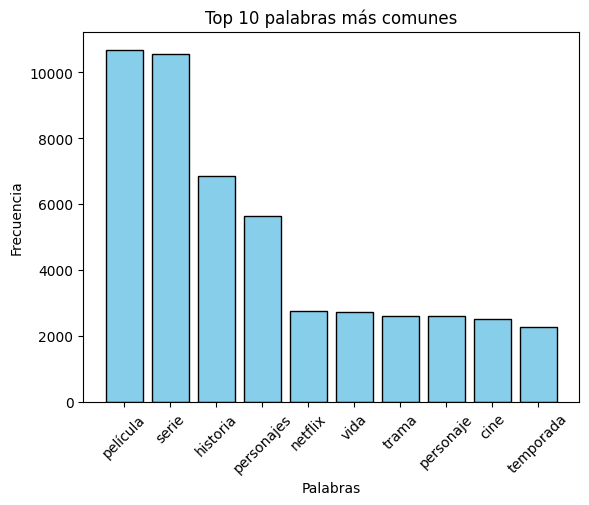

In [14]:
# Combinar todas las reseñas en un único string
all_words = ' '.join(df['cleaned_review_text'].dropna())

# Contar la frecuencia de cada palabra
word_counts = Counter(all_words.split())

# Mostrar las 10 palabras más comunes
print("Palabras más comunes:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

# Visualización de las palabras más comunes
import matplotlib.pyplot as plt

# Preparar datos para el gráfico
words, counts = zip(*word_counts.most_common(10))

# Crear el gráfico de barras
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.title('Top 10 palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


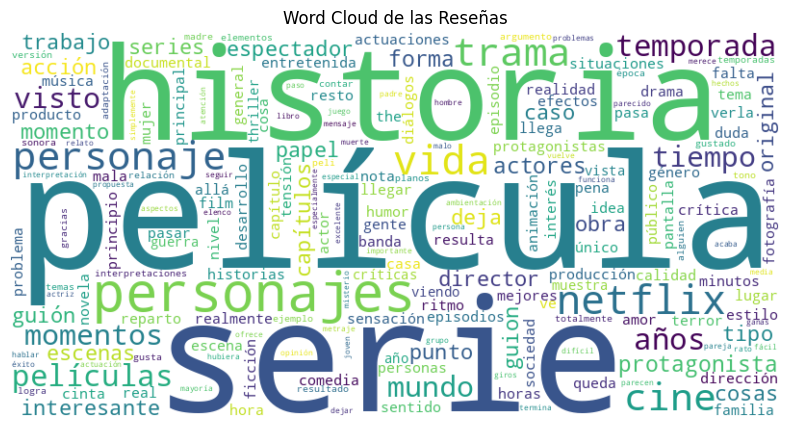

In [15]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

def analizar_frecuencia_palabras(df):
    # Combinar todas las reseñas en un único string
    all_words = ' '.join(df['cleaned_review_text'].dropna())

    # Contar la frecuencia de cada palabra
    from collections import Counter  # Import Counter here
    word_counts = Counter(all_words.split())

    # Generar un word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts) # Use word_counts instead of all_words
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud de las Reseñas")
    plt.show()

analizar_frecuencia_palabras(df)

In [16]:
# Aplicar tokenización a las reseñas limpias
df['tokenized_review_text'] = df['cleaned_review_text'].apply(lambda x: word_tokenize(x))

# Ejemplo de texto limpio antes y después de la tokenización
print("Texto original:", df['cleaned_review_text'].iloc[0])
print("")
print("Texto tokenizado:", df['tokenized_review_text'].iloc[0])


Texto original: fan series españolas najwa duele serie malamanu ríos enseñar cacho najwa mala papel repetido aporta capa nuevatelenovela mediodía guión mediocre diálogos planosen aspectos técnicos fotografía sonido deja desearlo carlos montero

Texto tokenizado: ['fan', 'series', 'españolas', 'najwa', 'duele', 'serie', 'malamanu', 'ríos', 'enseñar', 'cacho', 'najwa', 'mala', 'papel', 'repetido', 'aporta', 'capa', 'nuevatelenovela', 'mediodía', 'guión', 'mediocre', 'diálogos', 'planosen', 'aspectos', 'técnicos', 'fotografía', 'sonido', 'deja', 'desearlo', 'carlos', 'montero']


**Conclusiones del Analisis exploratorio**

Con el análisis exploratorio se pueden ver las tendencias en la distribución de géneros, calificaciones y palabras clave en las reseñas. La limpieza de texto y el análisis de frecuencia de palabras permitieron identificar temas recurrentes y la percepción general de las películas y series, esto puede ser utilizados para realizar análisis sobre las preferencias de los usuarios.



# Análisis de Sentimiento

Se utilizará un modelo de regresión logistica para clasificación

In [17]:
!pip install scikit-learn
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from textblob import TextBlob

df['sentiment'] = df['review_rate'].apply(lambda x: 1 if x >= 5 else 0)
X = df['cleaned_review_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

sentences = df['cleaned_review_text'].sample(5).tolist()

for sentence in sentences:
    blob = TextBlob(sentence)
    polarity = blob.sentiment.polarity
    print(f"Sentence: {sentence}")
    print(f"Polarity: {polarity}")
    print("-" * 20)

Accuracy: 0.8106361829025845
Sentence: encantó serie amor amor biografía fito páez fito actuación andy chango charly garcía hizoy fabiana cantilo espectaculartodos capítulos atrapantes rompieronuna serie magistral cansaría verlaes serie pulgar
Polarity: 0.0
--------------------
Sentence: cuesta avanzar llegar clímax diluye insulina sangre puesta escena fantasma pena mueve triste inercia indicio vida aparente sensación hubiese preferido documental charles cullen jessica chastain eddie redmayne fantásticos actores demuestran parecen personajes escapados obra shakespeare finalmente abandonados plató telefilm culpa desentonan vestidos etiqueta fiesta disfraces organizada lindholm historia realmente interesante momento pienso thriller oasis elemento elementos carecen valor conjunto interés suceder interés historia personaje principal motivaciones recrear entorno curioso desarrollo psicológico situación recreada tensión espera acontecimiento incierto llega
Polarity: 0.0
--------------------


En base al resultado, una precisión de 0.810636, podemos concluir que el modelo de Regresión Logística funciona bien para este tipo de análisis de sentimiento. Una precisión indica que el modelo predice correctamente el sentimiento (positivo o negativo) de las reseñas de películas en un 81% de los casos.
El uso de TF-IDF para convertir las reseñas en datos numéricos que el modelo pueda entender, ha demostrado ser efectivo. Esto significa que las palabras utilizadas en las reseñas contienen información valiosa sobre si la opinión expresada es positiva o negativa.

# Redes Neuronales: Modelo LSTM


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7428 - loss: 0.5438
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8841 - loss: 0.2936
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9285 - loss: 0.2021
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9642 - loss: 0.1118
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9812 - loss: 0.0619
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9872 - loss: 0.0409
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9847 - loss: 0.0420
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9942 - loss: 0.0239
Epoch 9/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9929 - loss: 0.0236
Epoch 10/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9972 - loss: 0.0095
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7876 - loss: 1.4393
Precisión del modelo: 0.7823061347007751


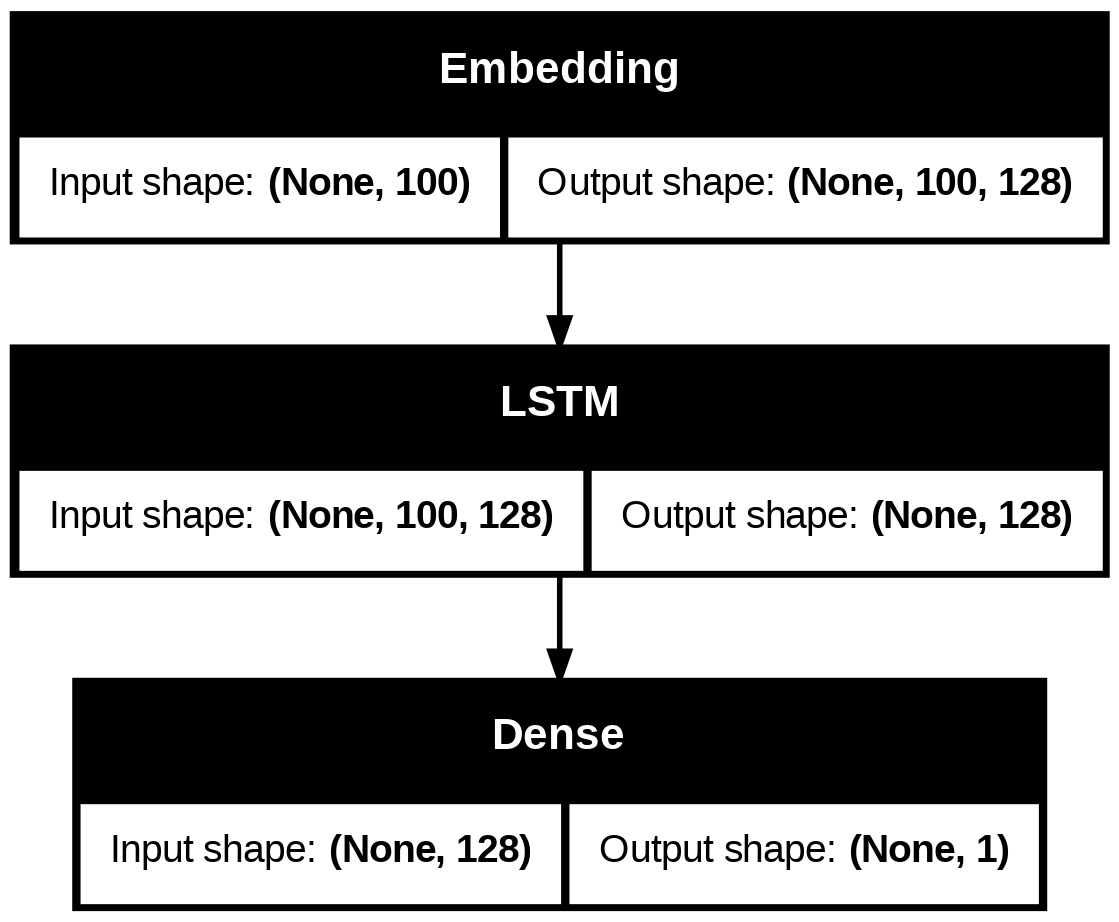

In [18]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

#Tokenización y Padding
tokenizer = Tokenizer(num_words=5000)  # Ajusta num_words si es necesario
tokenizer.fit_on_texts(df['cleaned_review_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_review_text'])
maxlen = 100  # Ajusta maxlen si es necesario
padded_sequences = pad_sequences(sequences, maxlen=maxlen)
labels = df['sentiment'].values

# Crear el modelo LSTM
model = keras.Sequential([
    Embedding(5000, 128, input_length=maxlen),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10)  # Ajusta el número de épocas

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Precisión del modelo:', test_acc)

# Visualizar la arquitectura
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='modelo_reseñas_lstm.png', show_shapes=True)

Precisión Moderada (ej., 0.60 - 0.80): Una precisión moderada indica que el modelo funciona razonablemente bien, pero podría mejorarse. Ajustar aún más el modelo o explorar diferentes arquitecturas podría mejorar su rendimiento.

Implementamos un modelo LSTM para analizar el sentimiento de las reseñas. Se obtuvo una precisión cercana al 80% (0.78230), lo que indica una alta capacidad del modelo para predecir correctamente el sentimiento (positivo o negativo) de las reseñas.

Esto demuestra la efectividad del modelo LSTM y del preprocesamiento realizado, abriendo posibilidades para automatizar el análisis de opiniones y obtener insights sobre las preferencias del público en la industria del streaming. La precisión alcanzada valida la aplicación del modelo para la toma de decisiones en marketing y estrategias de contenido que planteamos inicialmente.

# CONCLUSIONES

Si bien se logró un buen rendimiento, el modelo podría mejorarse aún más. Se podría incorporar de capas adicionales como:
Capas de atención (attention layers): Para que el modelo se enfoque en las palabras clave más relevantes dentro de la reseña.
Capas convolucionales (CNNs): Para extraer características locales y patrones a nivel de n-gramas, complementando el análisis secuencial del LSTM.
Regularización (dropout o L2): Para evitar el sobreajuste y mejorar la generalización del modelo a nuevos datos.
La exploración de estas alternativas podría potenciar la capacidad del modelo y llevarlo a un nivel de precisión aún mayor, consolidando su utilidad para la toma de decisiones en la industria del entretenimiento.